# This notebook plots PDF of Tb and rain rate coarsen to 0.25 degree
# The data is produced by:
- /src/calc_tb_rainrate_pdf_byregion_regrid.py
- /src/calc_gpm_dpr_imerg_match_rainrate_pdf.py

In [1]:
import numpy as np
import xarray as xr
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
%matplotlib inline

In [2]:
PHASE = 'Summer'
# PHASE = 'Winter'

tracker = 'PyFLEXTRKR'
rootdir = f'/pscratch/sd/f/feng045/DYAMOND/mcs_stats/{PHASE}/{tracker}/'

if PHASE == 'Summer':
    name_map = {
        'obs': 'OBS',
        'obsv7': 'OBSv7',
        'm1': 'ARPEGE',
        'm2': 'IFS',
        'm3': 'MPAS',
        'm4': 'NICAM',
        'm5': 'SAM',
        'm6': 'UM',
        'm7': 'FV3',
        # 'm8': 'ICON',
        'm12': 'SCREAMv1',
    }

if PHASE == 'Winter':
    name_map = {
        'obs': 'OBS',
        'obsv7': 'OBSv7',
        'm1': 'ARPEGE',
        'm2': 'IFS',
        'm3': 'MPAS',
        # 'm4': 'NICAM',
        'm5': 'SAM',
        'm6': 'UM',
        'm7': 'GRIST',
        'm8': 'SCREAM',
        'm9': 'XSHiELD',
        'm10': 'GEOS',
        'm11': 'ICON',
        'm12': 'SCREAMv1',
    }

# Rainrate files
rainfiles = {key:f'{rootdir}/tb_rainrate_hist_{PHASE}_{value}_regrid.nc' for key,value in name_map.items()}
dprfile = f'/pscratch/sd/f/feng045/DYAMOND/GPM_DYAMOND/DPR/regrid_0.25deg/rainrate_hist_{PHASE}_DPR.nc'

figdir = f'/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/{PHASE}/figures/MCSMIP/'
figdir_tracker = f'/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/{PHASE}/figures/{tracker}/'
os.makedirs(figdir, exist_ok=True)
os.makedirs(figdir_tracker, exist_ok=True)
print(figdir, figdir_tracker)

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Summer/figures/MCSMIP/ /global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Summer/figures/PyFLEXTRKR/


## Check if input files exist

In [3]:
print(f'{dprfile}: {os.path.isfile(dprfile)}')

/pscratch/sd/f/feng045/DYAMOND/GPM_DYAMOND/DPR/regrid_0.25deg/rainrate_hist_Summer_DPR.nc: True


In [4]:
for key, value in rainfiles.items():
    print(f'{value}: {os.path.isfile(value)}')

/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_OBS_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_OBSv7_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_ARPEGE_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_IFS_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_MPAS_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_NICAM_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_SAM_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_UM_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRKR//tb_rainrate_hist_Summer_FV3_regrid.nc: True
/pscratch/sd/f/feng045/DYAMOND/mcs_stats/Summer/PyFLEXTRK

In [5]:
# Read DPR data
ds_dpr = xr.open_dataset(dprfile)
ds_dpr

<xarray.Dataset>
Dimensions:                   (bins_pcp: 299)
Coordinates:
  * bins_pcp                  (bins_pcp) int64 1 2 3 4 5 ... 295 296 297 298 299
Data variables: (12/22)
    total_pcp_dpr             (bins_pcp) int64 ...
    total_pcp_imerg_v6_in     (bins_pcp) int64 ...
    total_pcp_imerg_v7_in     (bins_pcp) int64 ...
    total_pcp_imerg_v6_out    (bins_pcp) int64 ...
    total_pcp_imerg_v7_out    (bins_pcp) int64 ...
    total_pcp_o_dpr           (bins_pcp) int64 ...
    ...                        ...
    mcs_pcp_o_dpr             (bins_pcp) int64 ...
    mcs_pcp_o_imerg_v6        (bins_pcp) int64 ...
    mcs_pcp_o_imerg_v7        (bins_pcp) int64 ...
    mcs_pcp_l_dpr             (bins_pcp) int64 ...
    mcs_pcp_l_imerg_v6        (bins_pcp) int64 ...
    mcs_pcp_l_imerg_v7        (bins_pcp) int64 ...
Attributes:
    title:          GPM DPR precipitation histogram
    lon_bounds:     [-180  180]
    lat_bounds:     [-15  30]
    resolution:     0.25deg
    landmask_file:  /pscratch/sd/f/feng045/DYAMOND/maps/era5_landmask.nc
    ocean_thresh:   [0.   0.01]
    land_thresh:    [0.95 1.  ]
    contact:        Zhe Feng, zhe.feng@pnnl.gov
    created_on:     Mon Jul  8 22:03:57 2024

In [6]:
# Read all data in Xarray Dataset
dsr = xr.open_mfdataset(list(rainfiles.values()), concat_dim='source', combine='nested')
# Assign new coordinate 'source' using names
dsr['source'] = list(name_map.keys())
lon_bounds = dsr.attrs['lon_bounds']
lat_bounds = dsr.attrs['lat_bounds']
dsr

<xarray.Dataset>
Dimensions:    (source: 10, bins_olr: 349, bins_tb: 190, bins_pcp: 299)
Coordinates:
  * bins_olr   (bins_olr) int64 50 51 52 53 54 55 56 ... 393 394 395 396 397 398
  * bins_tb    (bins_tb) int64 160 161 162 163 164 165 ... 345 346 347 348 349
  * bins_pcp   (bins_pcp) int64 1 2 3 4 5 6 7 8 ... 293 294 295 296 297 298 299
  * source     (source) <U5 'obs' 'obsv7' 'm1' 'm2' ... 'm5' 'm6' 'm7' 'm12'
Data variables:
    olr        (source, bins_olr) float64 dask.array<chunksize=(1, 349), meta=np.ndarray>
    tb         (source, bins_tb) int64 dask.array<chunksize=(1, 190), meta=np.ndarray>
    total_pcp  (source, bins_pcp) int64 dask.array<chunksize=(1, 299), meta=np.ndarray>
    mcs_pcp    (source, bins_pcp) int64 dask.array<chunksize=(1, 299), meta=np.ndarray>
    mcs_tb     (source, bins_tb) int64 dask.array<chunksize=(1, 190), meta=np.ndarray>
    mcs_pcp_o  (source, bins_pcp) int64 dask.array<chunksize=(1, 299), meta=np.ndarray>
    mcs_pcp_l  (source, bins_pcp) int64 dask.array<chunksize=(1, 299), meta=np.ndarray>
Attributes:
    title:         OLR, Tb, precipitation histogram
    lon_bounds:    [-180  180]
    lat_bounds:    [-15  30]
    start_date:    2016-08-10T00
    end_date:      2016-09-10T00
    ocean_thresh:  [0.   0.01]
    land_thresh:   [0.95 1.  ]
    tracker:       PyFLEXTRKR
    contact:       Zhe Feng, zhe.feng@pnnl.gov
    created_on:    Tue Jul  9 01:08:57 2024

## Add DPR histogram to combined data

In [7]:
# Expand the dimension of the DPR DataArrays
dprpcp_hist = ds_dpr.total_pcp_dpr.expand_dims(dim='source', axis=0).assign_coords(source=['dpr'])
dprmcspcp_hist = ds_dpr.mcs_pcp_dpr.expand_dims(dim='source', axis=0).assign_coords(source=['dpr'])
dprmcspcp_o_hist = ds_dpr.mcs_pcp_o_dpr.expand_dims(dim='source', axis=0).assign_coords(source=['dpr'])
dprmcspcp_l_hist = ds_dpr.mcs_pcp_l_dpr.expand_dims(dim='source', axis=0).assign_coords(source=['dpr'])

# Concatenate the expanded DPR DataArrays with the others
totpcp_hist = xr.concat([dprpcp_hist, dsr.total_pcp], dim='source')
mcspcp_hist = xr.concat([dprmcspcp_hist, dsr.mcs_pcp], dim='source')
mcspcp_o_hist = xr.concat([dprmcspcp_o_hist, dsr.mcs_pcp_o], dim='source')
mcspcp_l_hist = xr.concat([dprmcspcp_l_hist, dsr.mcs_pcp_l], dim='source')

# Make a new dictionary for pcp by adding 'dpr', and update obs
pcp_name_map = copy.deepcopy(name_map)
pcp_name_map['dpr'] = 'DPR'
pcp_name_map['obs'] = 'IMERGv6'
pcp_name_map['obsv7'] = 'IMERGv7'
print(pcp_name_map)

{'obs': 'IMERGv6', 'obsv7': 'IMERGv7', 'm1': 'ARPEGE', 'm2': 'IFS', 'm3': 'MPAS', 'm4': 'NICAM', 'm5': 'SAM', 'm6': 'UM', 'm7': 'FV3', 'm12': 'SCREAMv1', 'dpr': 'DPR'}


## Divide histogram by total sample size to get PDF

In [8]:
tb_pdf = dsr.tb / dsr.tb.sum(dim='bins_tb')
# totpcp_pdf = dsr.total_pcp / dsr.total_pcp.sum(dim='bins_pcp')
totpcp_pdf = totpcp_hist / totpcp_hist.sum(dim='bins_pcp')

mcstb_pdf = dsr.mcs_tb / dsr.mcs_tb.sum(dim='bins_tb')
# mcspcp_pdf = dsr.mcs_pcp / dsr.mcs_pcp.sum(dim='bins_pcp')
mcspcp_pdf = mcspcp_hist / mcspcp_hist.sum(dim='bins_pcp')

mcspcp_o_pdf = mcspcp_o_hist / mcspcp_o_hist.sum(dim='bins_pcp')
mcspcp_l_pdf = mcspcp_l_hist / mcspcp_l_hist.sum(dim='bins_pcp')

In [9]:
# fig, axes = plt.subplots(2, 2, figsize=[10,8], dpi=100)

# ax00 = axes[0][0]
# xr.plot.line(tb_pdf, x='bins_tb', ax=ax00)
# ax00.set_yscale('log')
# ax00.set_ylim((1e-5, 1e-1))

# ax10 = axes[1][0]
# xr.plot.line(totpcp_pdf, x='bins_pcp', ax=ax10)
# # ax10.set_xscale('log')
# ax10.set_yscale('log')

# ax01 = axes[0][1]
# xr.plot.line(mcstb_pdf, x='bins_tb', ax=ax01)
# ax01.set_xscale('linear')
# ax01.set_yscale('linear')
# ax01.set_xlim((170, 241))
# # ax01.set_ylim((1e5, 1e8))

# ax11 = axes[1][1]
# xr.plot.line(mcspcp_pdf, x='bins_pcp', ax=ax11)
# ax11.set_xscale('linear')
# ax11.set_yscale('log')
# # ax11.set_ylim((1e5, 2e8))

## Compute precipitation fractional contribution by rain rate

In [10]:
# Multiply histogram by bin value to get total amount of rain for each bin
totamt_hist = dsr.total_pcp * dsr.bins_pcp
mcsamt_hist = dsr.mcs_pcp * dsr.bins_pcp

# Get fractional contribution by dividing the sum of all rain bins
totamt_frac = totamt_hist / totamt_hist.sum(dim='bins_pcp')
mcsamt_frac = mcsamt_hist / mcsamt_hist.sum(dim='bins_pcp')

In [11]:
# Multiply histogram by bin value to get total amount of rain for each bin
mcsamt_o_hist = mcspcp_o_hist * dsr.bins_pcp
mcsamt_l_hist = mcspcp_l_hist * dsr.bins_pcp

# Get fractional contribution by dividing the sum of all rain bins
mcsamt_o_frac = mcsamt_o_hist / mcsamt_o_hist.sum(dim='bins_pcp')
mcsamt_l_frac = mcsamt_l_hist / mcsamt_l_hist.sum(dim='bins_pcp')

In [12]:
# fig, axes = plt.subplots(2, 1, figsize=[8,8], dpi=100)

# ax0 = axes[0]
# xr.plot.line(mcsamt_o_frac, x='bins_pcp', ax=ax0)
# ax0.set_xscale('log')
# ax0.set_yscale('linear')
# # ax0.set_ylim((1e5, 1e8))

# ax1 = axes[1]
# xr.plot.line(mcsamt_l_frac, x='bins_pcp', ax=ax1)
# ax1.set_xscale('log')
# ax1.set_yscale('linear')
# # ax1.set_ylim((1e5, 2e8))

## Function to plot histograms

In [13]:
def plot_hist_nrow(nrow, xx_data, data_arr, titles, xlabels, ylabels, legends, figname,  
                    map_extent=None, lonbox=None, latbox=None, inset_param=None, map_panel=[0,0],
                    xscale=None, yscale=None, xlims=None, ylims=None, vspan=None, vspan_color=None,
                    wspace=None, hspace=None, xticks=None,
                    show_inset=None, inset_dict=None, legend_prop=None, fontsize=None, figsize=[10,10]):

    mpl.rcParams['font.size'] = fontsize
    mpl.rcParams['font.family'] = 'Helvetica'
    # fig, axes = plt.subplots(nrows=nrow, ncols=1, figsize=figsize, dpi=100)
    fig = plt.figure(figsize=figsize, dpi=100)
    gs = gridspec.GridSpec(nrow, 1, wspace=wspace, hspace=hspace)
    # gs = gridspec.GridSpec(nrow, 1, left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=wspace, hspace=hspace)
    # gs.update(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=wspace, hspace=hspace)

    lw = 2
    lcolors = {
        'dpr': 'darkblue',
        'obs': 'k', 
        'obsv7': 'darkgray',
        'm1': 'crimson',
        'm2': 'darkorange', 
        'm3': 'gold',
        'm4': 'green',
        'm5': 'turquoise',
        'm6': 'lime',
        'm7': 'blue',
        'm8': 'deepskyblue',
        'm9': 'purple',
        'm10': 'violet',
        'm11': 'deeppink',
        'm12': 'dodgerblue',
    }
    # time_fmt = mdates.DateFormatter('%m/%d')

    for row in range(0, nrow):
        # ax = axes[row]
        ax = plt.subplot(gs[row])
        source_list = list(data_arr[row].source.data)
        for ss in source_list:
            if (ss == 'obs'):
                linewidth = lw*4
                linestyle = '-'
            elif (ss == 'dpr'):
                linewidth = lw*3
                linestyle = '-'
            elif ss == 'obsv7':
                linewidth = lw*1.5
                linestyle = '-'
            else:
                linewidth = lw
                linestyle = '-'
            # linewidth = lw*3 if 'obs' in ss else lw
            ax.plot(xx_data[row], data_arr[row].sel(source=ss), lcolors[ss], lw=linewidth, ls=linestyle, label=legends[row][ss])

        ax.tick_params(axis='x', labelsize=None)
        ax.set_title(titles[row], loc='left')
        ax.set_xlabel(xlabels[row])
        ax.set_ylabel(ylabels[row])
        if (xlims is not None): ax.set_xlim(xlims[row][0], xlims[row][1])
        if (ylims is not None): ax.set_ylim(ylims[row][0], ylims[row][1])
        if (xscale is not None): ax.set_xscale(xscale[row])
        if (yscale is not None): ax.set_yscale(yscale[row])
        if (xticks is not None):
            ax.set_xticks(xticks[row])
            ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        ax.grid(which='major', ls='--')
        ax.legend(ncol=legend_prop['ncol'], fontsize=legend_prop['fontsize'], loc=legend_prop['loc'])
        # Shade 
        if vspan is not None:
            ax.axvspan(vspan[row][0], vspan[row][1], facecolor=vspan_color, alpha=0.2, zorder=0)
            # ax.axvline(monthday1[ii], color='k', ls='--', lw=1.5)
        
        if (show_inset[row]):
            x_sub = inset_dict['x_sub']
            y_sub = inset_dict['y_sub']
            yscale_sub = inset_dict['yscale']
            xscale_sub = inset_dict['xscale']
            xticks_sub = inset_dict['xticks']
            box_color = inset_dict['box_color']
            line_width = inset_dict['line_width']
            width = inset_dict['width']
            height = inset_dict['height']
            loc = inset_dict['loc']
            borderpad = inset_dict['borderpad']
            # Create the inset plot
            axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)

            # Plot the inset plot data
            for ss in source_list:
                if ss == 'obs':
                    linewidth = lw*2
                elif (ss == 'dpr'):
                    linewidth = lw*2
                elif ss == 'obsv7':
                    linewidth = lw*1
                else:
                    linewidth = lw*0.7
                # linewidth = lw*3 if 'obs' in ss else lw
                axins.plot(xx_data[row], data_arr[row].sel(source=ss), lcolors[ss], lw=linewidth, label=legends[row][ss])
            axins.set_xlim(x_sub[0], x_sub[1])
            axins.set_ylim(y_sub[0], y_sub[1])
            if (xscale_sub is not None): axins.set_xscale(xscale_sub[row])
            if (yscale_sub is not None): axins.set_yscale(yscale_sub[row])
            axins.set_xlabel(xlabels[row])
            axins.set_xticks(xticks_sub)
            axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
            axins.grid(which='major', ls='--')

            # Add rectangle indicating the zoomed region in the main plot
            rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
            ax.add_patch(rect)

    # fig.autofmt_xdate()
    # fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')

    return fig

In [14]:
if PHASE == 'Summer':
    panel_numbers = ['(a)', '(c)']
elif PHASE == 'Winter':
    panel_numbers = ['(b)', '(d)']
panel_numbers

['(a)', '(c)']

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Summer/figures/MCSMIP/global_tb_pcp_pdf_regrid.png


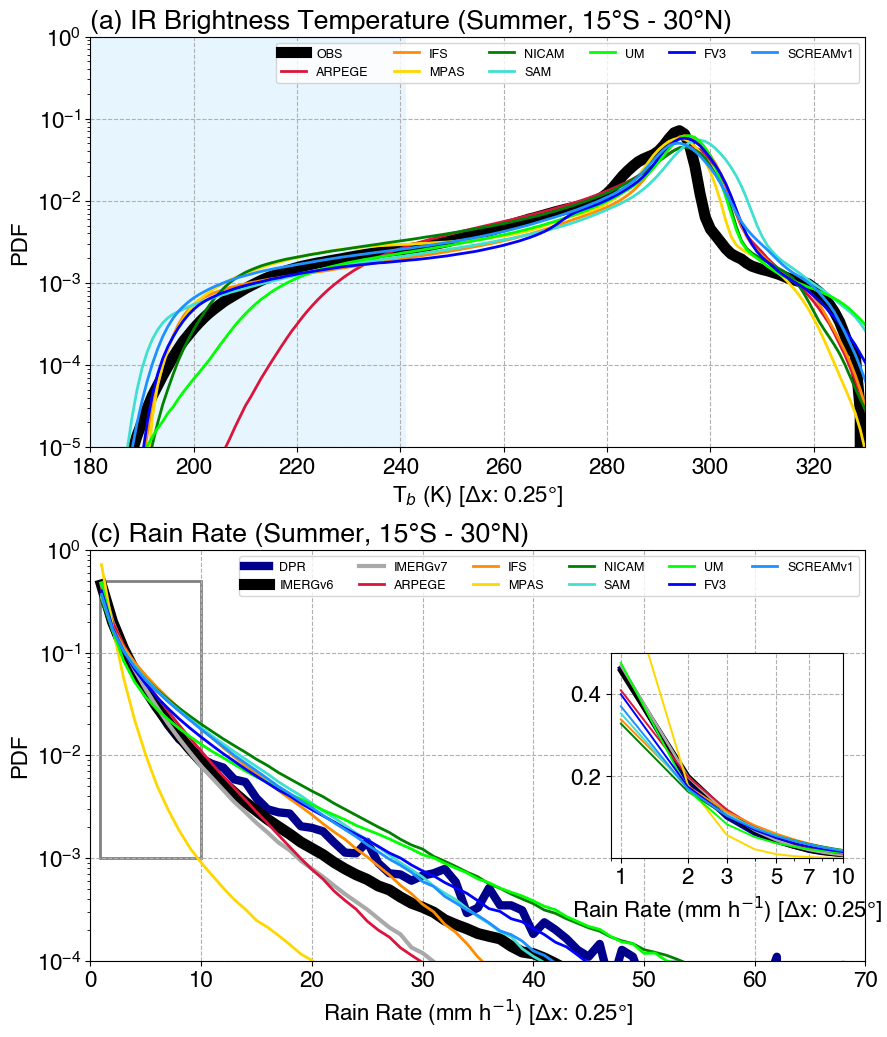

In [15]:
# data_arr = [tb_pdf, totpcp_pdf]
tb_pdf_new = tb_pdf.drop_sel(source='obsv7')
tb_name_map = tb_pdf_new.source
data_arr = [tb_pdf_new, totpcp_pdf]
xx_data = [dsr.bins_tb, dsr.bins_pcp]
nrow = len(data_arr)

if (PHASE == 'Summer'): y_sub = (1e-3, 0.5)
if (PHASE == 'Winter'): y_sub = (1e-3, 0.5)
inset_dict = {
    # 'x_sub': (0.9, 15),
    'x_sub': (0.9, 10),
    'y_sub': y_sub,
    'xscale': ['log']*2,
    'yscale': ['linear']*2,
    # 'xticks': [1, 2, 3, 5, 7, 10, 15],
    'xticks': [1, 2, 3, 5, 7, 10,],
    'box_color': 'gray',
    'line_width': 2,
    'width': '30%',
    'height': '50%',
    'loc': 'center right',
    'borderpad': 1,
}

# Make lat bound formats for plotting
lat_min = f'{-1*lat_bounds[0]}°S' if lat_bounds[0] < 0 else f'{lat_bounds[0]}°N'
lat_max = f'{-1*lat_bounds[1]}°S' if lat_bounds[1] < 0 else f'{lat_bounds[1]}°N'
titles = [
    f'{panel_numbers[0]} IR Brightness Temperature ({PHASE}, {lat_min} - {lat_max})', 
    f'{panel_numbers[1]} Rain Rate ({PHASE}, {lat_min} - {lat_max})', 
]
ylabels = ['PDF', 'PDF',]
xlabels = ['T$_b$ (K) [\u0394x: 0.25\u00B0]', 'Rain Rate (mm h$^{-1}$) [\u0394x: 0.25\u00B0]']
xlims = [(180,330), (0, 70)]
ylims = [(1e-5, 1), (1e-4, 1)]
# ylims = None
xticks = [np.arange(180,321,20), np.arange(0,71,10)]
vspan = [(170, 241), (None, None)]
vspan_color = 'lightskyblue'
# vspan = [(241, 350), (None, None)]
# vspan_color = 'moccasin'
xscale = None
yscale = ['log', 'log']
show_inset = [False, True]
legends_tb = name_map
legends_pcp = pcp_name_map
legends = [name_map, pcp_name_map]
legend_prop = {'ncol':int(len(name_map)/2)+1, 'fontsize':9, 'loc':'best'}
wspace = 0.0
hspace = 0.25
fontsize = 16
figname = f'{figdir}global_tb_pcp_pdf_regrid.png'
print(figname)
fig = plot_hist_nrow(nrow, xx_data, data_arr, titles, xlabels, ylabels, legends, figname,
                     xlims=xlims, ylims=ylims, vspan=vspan, vspan_color=vspan_color, xscale=xscale, yscale=yscale,
                     show_inset=show_inset, inset_dict=inset_dict, wspace=wspace, hspace=hspace, xticks=xticks,
                     legend_prop=legend_prop, fontsize=fontsize, figsize=[10,12])

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Summer/figures/PyFLEXTRKR/global_tb_pcp_pdf_PyFLEXTRKR_regrid.png


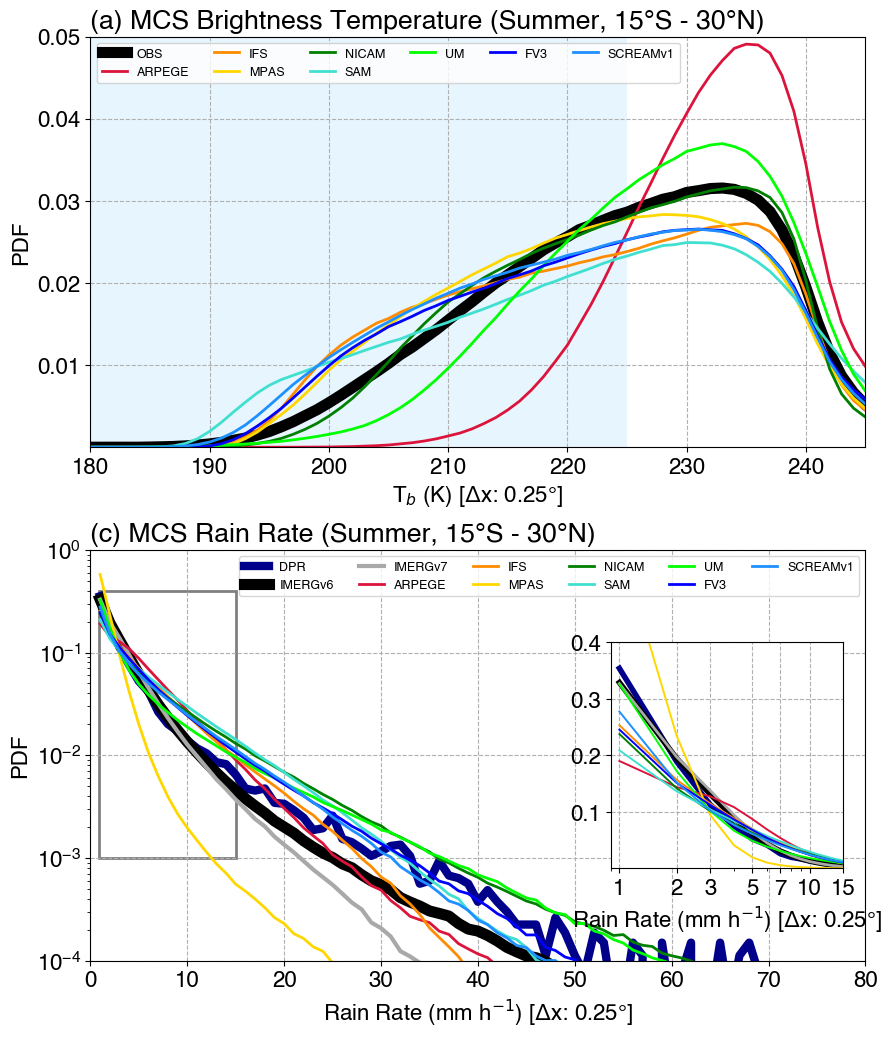

In [16]:
# data_arr = [mcstb_pdf, mcspcp_pdf]
mcstb_pdf_new = mcstb_pdf.drop_sel(source='obsv7')
data_arr = [mcstb_pdf_new, mcspcp_pdf]
xx_data = [dsr.bins_tb, dsr.bins_pcp]
nrow = len(data_arr)

if (PHASE == 'Summer'): y_sub = (1e-3, 0.4)
if (PHASE == 'Winter'): y_sub = (1e-3, 0.4)
inset_dict = {
    'x_sub': (0.9, 15),
    'y_sub': y_sub,
    'xscale': ['log']*2,
    'yscale': ['linear']*2,
    'xticks': [1, 2, 3, 5, 7, 10, 15],
    'box_color': 'gray',
    'line_width': 2,
    'width': '30%',
    'height': '55%',
    'loc': 'center right',
    'borderpad': 1,
}

# Make lat bound formats for plotting
lat_min = f'{-1*lat_bounds[0]}°S' if lat_bounds[0] < 0 else f'{lat_bounds[0]}°N'
lat_max = f'{-1*lat_bounds[1]}°S' if lat_bounds[1] < 0 else f'{lat_bounds[1]}°N'
titles = [
    f'{panel_numbers[0]} MCS Brightness Temperature ({PHASE}, {lat_min} - {lat_max})', 
    f'{panel_numbers[1]} MCS Rain Rate ({PHASE}, {lat_min} - {lat_max})', 
]
ylabels = ['PDF', 'PDF',]
xlabels = ['T$_b$ (K) [\u0394x: 0.25\u00B0]', 'Rain Rate (mm h$^{-1}$) [\u0394x: 0.25\u00B0]']
xlims = [(180,245), (0, 80)]
ylims = [(1e-5, 0.05), (1e-4, 1)]
# ylims = None
vspan = [(160, 225), (None, None)]
vspan_color = 'lightskyblue'
xscale = None
yscale = ['linear', 'log']
show_inset = [False, True]
# legends = name_map
legends_tb = name_map
legends_pcp = pcp_name_map
legends = [name_map, pcp_name_map]
legend_prop = {'ncol':int(len(name_map)/2)+1, 'fontsize':9, 'loc':'best'}
wspace = 0.0
hspace = 0.25
fontsize = 16
figname = f'{figdir_tracker}global_tb_pcp_pdf_{tracker}_regrid.png'
print(figname)
fig = plot_hist_nrow(nrow, xx_data, data_arr, titles, xlabels, ylabels, legends, figname,
                     xlims=xlims, ylims=ylims, vspan=vspan, vspan_color=vspan_color, xscale=xscale, yscale=yscale,
                     show_inset=show_inset, inset_dict=inset_dict, wspace=wspace, hspace=hspace,
                     legend_prop=legend_prop, fontsize=fontsize, figsize=[10,12])

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Summer/figures/PyFLEXTRKR/global_mcs_pcp_pdf_ocean_land_PyFLEXTRKR_regrid.png


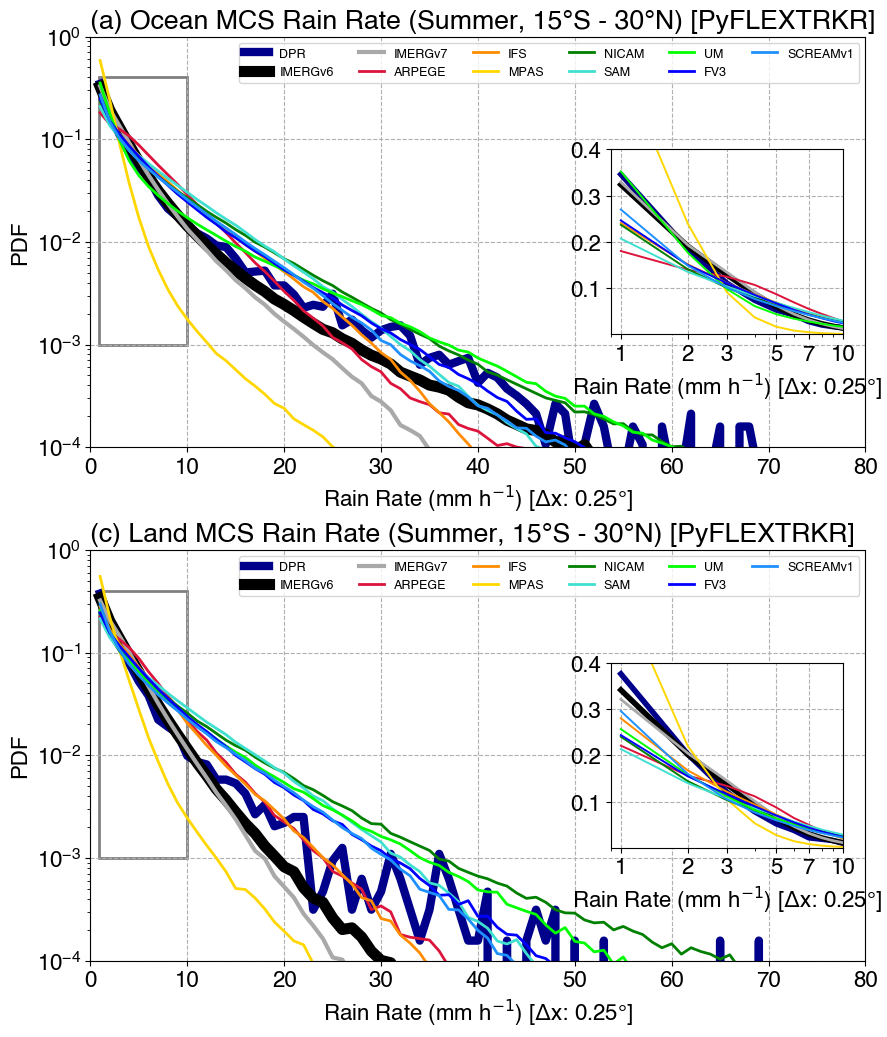

In [17]:
data_arr = [mcspcp_o_pdf, mcspcp_l_pdf]
xx_data = [dsr.bins_pcp, dsr.bins_pcp]
nrow = len(data_arr)

inset_dict = {
    'x_sub': (0.9, 10),
    'y_sub': (1e-3, 0.4),
    'xscale': ['log']*2,
    'yscale': ['linear']*2,
    'xticks': [1, 2, 3, 5, 7, 10],
    'box_color': 'gray',
    'line_width': 2,
    'width': '30%',
    'height': '45%',
    'loc': 'center right',
    'borderpad': 1,
}

# Make lat bound formats for plotting
lat_min = f'{-1*lat_bounds[0]}°S' if lat_bounds[0] < 0 else f'{lat_bounds[0]}°N'
lat_max = f'{-1*lat_bounds[1]}°S' if lat_bounds[1] < 0 else f'{lat_bounds[1]}°N'
titles = [
    f'{panel_numbers[0]} Ocean MCS Rain Rate ({PHASE}, {lat_min} - {lat_max}) [{tracker}]', 
    f'{panel_numbers[1]} Land MCS Rain Rate ({PHASE}, {lat_min} - {lat_max}) [{tracker}]', 
]
ylabels = ['PDF', 'PDF',]
xlabels = ['Rain Rate (mm h$^{-1}$) [\u0394x: 0.25\u00B0]', 'Rain Rate (mm h$^{-1}$) [\u0394x: 0.25\u00B0]']
xlims = [(0,80), (0,80)]
ylims = [(1e-4, 1), (1e-4, 1)]
xticks = [np.arange(0,81,10)]*2
vspan = [(None, None), (None, None)]
vspan_color = 'lightskyblue'
xscale = ['linear', 'linear']
yscale = ['log', 'log']
show_inset = [True, True]
legends_pcp = pcp_name_map
legends = [pcp_name_map, pcp_name_map]
legend_prop = {'ncol':int(len(name_map)/2)+1, 'fontsize':9, 'loc':'best'}
# legend_prop = {'ncol':1, 'fontsize':10, 'loc':'best'}
wspace = 0.0
hspace = 0.25
fontsize = 16
figname = f'{figdir_tracker}global_mcs_pcp_pdf_ocean_land_{tracker}_regrid.png'
print(figname)
fig = plot_hist_nrow(nrow, xx_data, data_arr, titles, xlabels, ylabels, legends, figname,
                     xlims=xlims, ylims=ylims, vspan=vspan, vspan_color=vspan_color, xscale=xscale, yscale=yscale,
                     show_inset=show_inset, inset_dict=inset_dict, wspace=wspace, hspace=hspace, xticks=xticks,
                     legend_prop=legend_prop, fontsize=fontsize, figsize=[10,12])

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Summer/figures/PyFLEXTRKR/global_mcs_pcp_fractional_pdf_ocean_land_PyFLEXTRKR_regrid.png


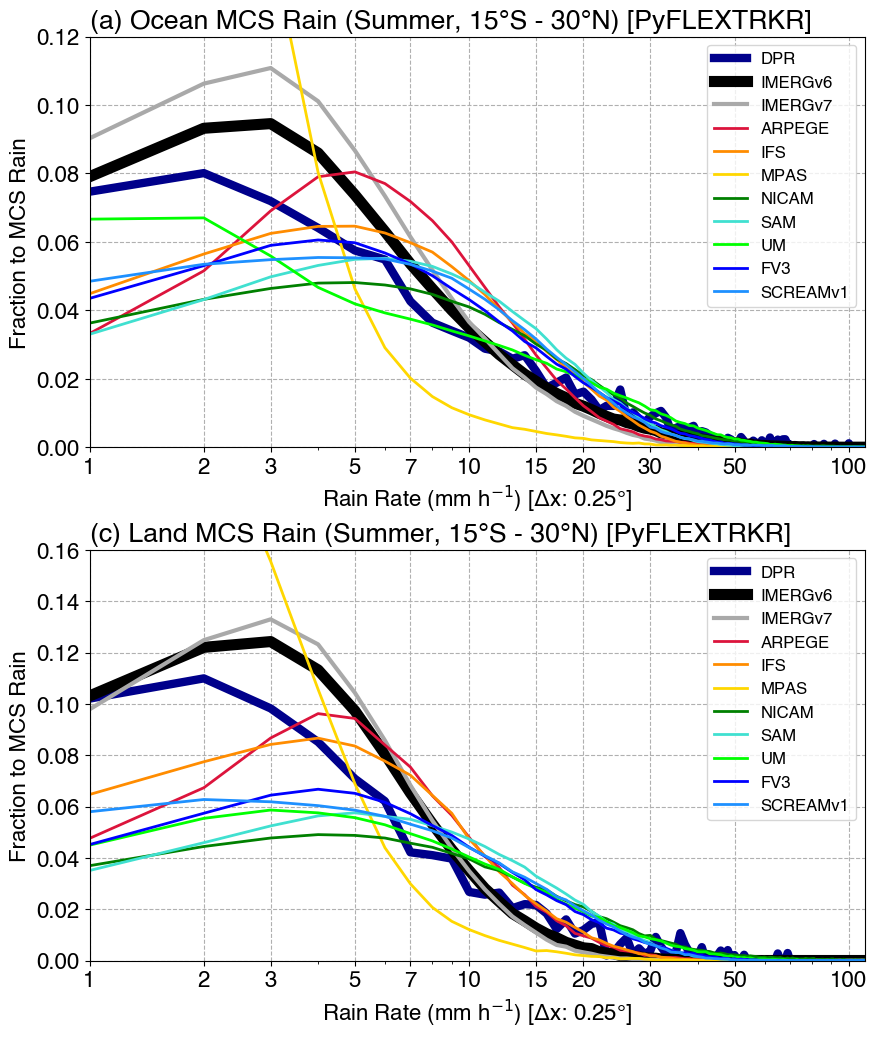

In [18]:
data_arr = [mcsamt_o_frac, mcsamt_l_frac]
xx_data = [dsr.bins_pcp, dsr.bins_pcp]
nrow = len(data_arr)

inset_dict = {
    'x_sub': (10, 100),
    'y_sub': (1e-4, 0.05),
    'xscale': ['linear']*2,
    'yscale': ['log']*2,
    'xticks': [10,25,50,75,100],
    'box_color': 'gray',
    'line_width': 2,
    'width': '30%',
    'height': '40%',
    'loc': 'center right',
    'borderpad': 1,
}

# Make lat bound formats for plotting
lat_min = f'{-1*lat_bounds[0]}°S' if lat_bounds[0] < 0 else f'{lat_bounds[0]}°N'
lat_max = f'{-1*lat_bounds[1]}°S' if lat_bounds[1] < 0 else f'{lat_bounds[1]}°N'
titles = [
    f'{panel_numbers[0]} Ocean MCS Rain ({PHASE}, {lat_min} - {lat_max}) [{tracker}]', 
    f'{panel_numbers[1]} Land MCS Rain ({PHASE}, {lat_min} - {lat_max}) [{tracker}]', 
]
ylabels = ['Fraction to MCS Rain', 'Fraction to MCS Rain',]
xlabels = ['Rain Rate (mm h$^{-1}$) [\u0394x: 0.25\u00B0]', 'Rain Rate (mm h$^{-1}$) [\u0394x: 0.25\u00B0]']
xlims = [(1,110), (1, 110)]
ylims = [(0, 0.12), (0, 0.16)]
# ylims = None
xticks = [[1,2,3,5,7,10,15,20,30,50,100]]*2
vspan = [(None, None), (None, None)]
vspan_color = 'lightskyblue'
xscale = ['log', 'log']
yscale = ['linear', 'linear']
show_inset = [False, False]
legends_pcp = pcp_name_map
legends = [pcp_name_map, pcp_name_map]
# legend_prop = {'ncol':int(len(name_map)/2)+1, 'fontsize':9, 'loc':'best'}
legend_prop = {'ncol':1, 'fontsize':12, 'loc':'best'}
wspace = 0.0
hspace = 0.25
fontsize = 16
figname = f'{figdir_tracker}global_mcs_pcp_fractional_pdf_ocean_land_{tracker}_regrid.png'
print(figname)
fig = plot_hist_nrow(nrow, xx_data, data_arr, titles, xlabels, ylabels, legends, figname,
                     xlims=xlims, ylims=ylims, vspan=vspan, vspan_color=vspan_color, xscale=xscale, yscale=yscale,
                     show_inset=show_inset, inset_dict=inset_dict, wspace=wspace, hspace=hspace, xticks=xticks,
                     legend_prop=legend_prop, fontsize=fontsize, figsize=[10,12])